# How to find a good learning rate

Finding a good learning rate is very important when training models. If it's too large, the training will diverge, and if it's too low, training will be unnecessarily slow.

We can use a heuristic called the learning rate finder to find a good learning rate. It works by training with a very low learning rate and exponentially increasing it very quickly until the loss diverges. By plotting learning rates against losses we can find a good a value. 

We'll set up a `Learner` as usual:

In [289]:
using CairoMakie; CairoMakie.activate!(type="svg")
using FastAI

In [384]:
data = Datasets.loadtaskdata(Datasets.datasetpath("imagenette2-320"), ImageClassification)
method = ImageClassification(Datasets.getclassesclassification("imagenette2-160"), (224, 224))
learner = methodlearner(method, data, Models.xresnet18(), ToGPU(), Metrics(accuracy))

Learner()

Then we use [`lrfind`](#) which handles the exponential learning rate scheduling and early termination. It will also reset the model when it is done.

In [388]:
result = lrfind(learner, learner.data.training)

Epoch 1 TrainingPhase(&):  11%|███                       |  ETA: 0:00:53

LRFindResult(
    FastAI.Steepest(0.98) => 0.00022908676527677726
    FastAI.MinDivByTen(0.98) => 8.317637711026709e-5
)

We can plot the result of the learning rate finder:

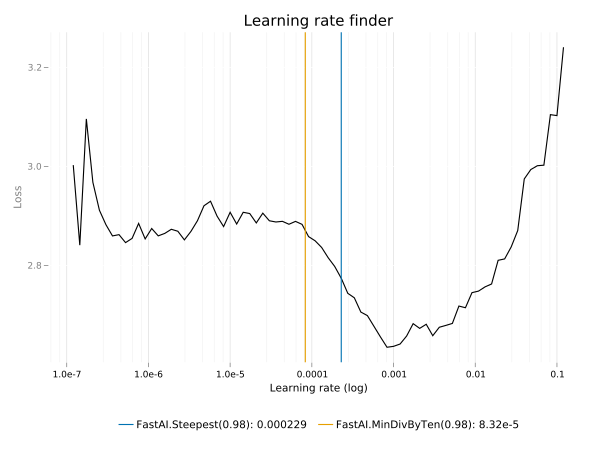

In [389]:
plot(result)

In [ ]:
fitonecycle!(learner, 5, 0.0002)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:59


┌───────────────┬───────┬────────┬──────────┐
│         Phase │ Epoch │   Loss │ Accuracy │
├───────────────┼───────┼────────┼──────────┤
│ TrainingPhase │   1.0 │ 1.8848 │  0.37147 │
└───────────────┴───────┴────────┴──────────┘


Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   1.0 │ 1.33285 │   0.5707 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:52


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   2.0 │ 1.22554 │  0.60528 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   2.0 │ 0.97006 │  0.69667 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:54


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   3.0 │ 0.85613 │  0.72058 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:03


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   3.0 │ 0.83038 │    0.737 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:57


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   4.0 │ 0.60502 │  0.81031 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:04


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   4.0 │ 0.74778 │  0.76378 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 5 TrainingPhase():  23%|██████▏                   |  ETA: 0:00:47